In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# 결과 파일들이 저장된 폴더
results_dir = "../MLPClassifier/results"

# y_test와 y_pred 불러오기
y_test = np.load(f"{results_dir}/y_test.npy", allow_pickle=True)
y_pred = np.load(f"{results_dir}/y_pred.npy", allow_pickle=True)

print("y_test, y_pred 불러오기 완료!")


y_test, y_pred 불러오기 완료!


In [ ]:
# 분류 결과 출력
report = classification_report(y_test, y_pred)
print("=== Classification Report ===")
print(report)


=== Classification Report ===
              precision    recall  f1-score   support

       angry       0.76      0.77      0.76      5700
       happy       0.89      0.88      0.89      5700
     neutral       0.77      0.80      0.78      5700
         sad       0.78      0.74      0.76      5700

    accuracy                           0.80     22800
   macro avg       0.80      0.80      0.80     22800
weighted avg       0.80      0.80      0.80     22800



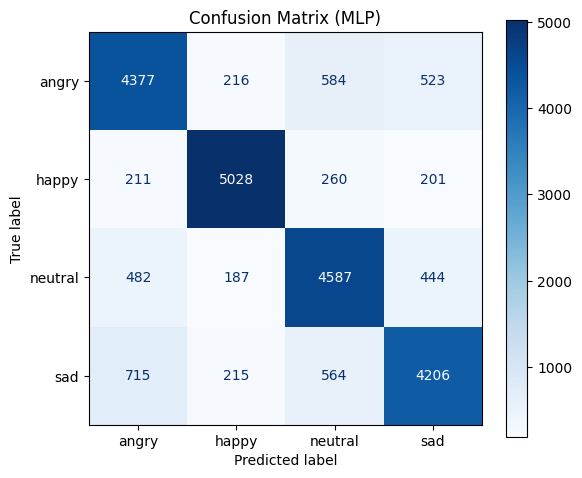

In [5]:
# 혼동행렬 시각화
classes = ["angry", "happy", "neutral", "sad"]
cm = confusion_matrix(y_test, y_pred, labels=classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)

fig, ax = plt.subplots(figsize=(6, 5))
disp.plot(ax=ax, cmap=plt.cm.Blues)
plt.title("Confusion Matrix (MLP)")
plt.tight_layout()

# 이미지 파일로 저장
plt.savefig(f"{results_dir}/confusion_matrix.png")
plt.show()


<Figure size 800x500 with 0 Axes>

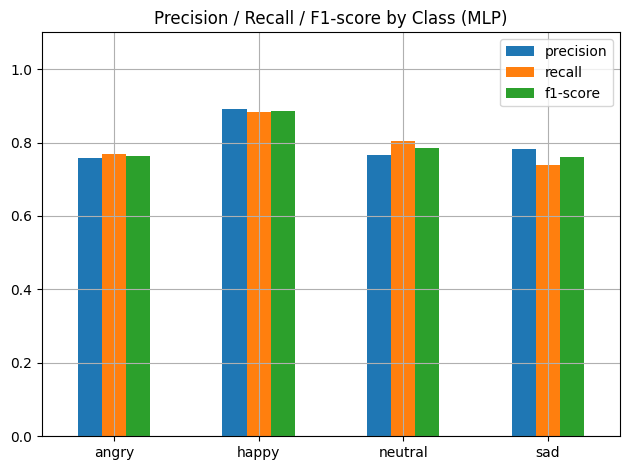

In [6]:
# classification_report를 dict 형식으로 변환하여 DataFrame으로 만들기
report_dict = classification_report(y_test, y_pred, output_dict=True)
metrics_df = pd.DataFrame(report_dict).transpose().loc[classes, ["precision", "recall", "f1-score"]]

plt.figure(figsize=(8, 5))
metrics_df.plot(kind="bar")
plt.title("Precision / Recall / F1-score by Class (MLP)")
plt.ylim(0, 1.1)
plt.grid(True)
plt.xticks(rotation=0)
plt.tight_layout()

# 이미지 파일로 저장
plt.savefig(f"{results_dir}/classification_report_bar.png")
plt.show()
